In [77]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

set_label = ['50-25','75-37','100-50','125-67','150-75']
set_A_05 = ['1226_1700', '1226_1713', '1226_1727', '1226_1741', '1226_1756']
set_B_02 = ['0104_2223', '0104_2309', '0104_2328', '0104_2343', '0105_0013']
set_C_10 = ['0116_0117', '0116_0125', '0116_0132', '0116_0140', '0116_0149']
set_D_06 = ['0104_1949', '0104_2002', '0104_2016', '0104_2032', '0104_2056']

s1s2_path = './s1s2_score_B60.csv'

In [78]:
df = pd.read_csv(s1s2_path)
X = np.array([df['scan_enp'], df['bev_enp']]).T
y = np.array(df['s1_gt'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

def evaluate_regression(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, mae, r2

<Axes: xlabel='bev_enp', ylabel='scan_enp'>

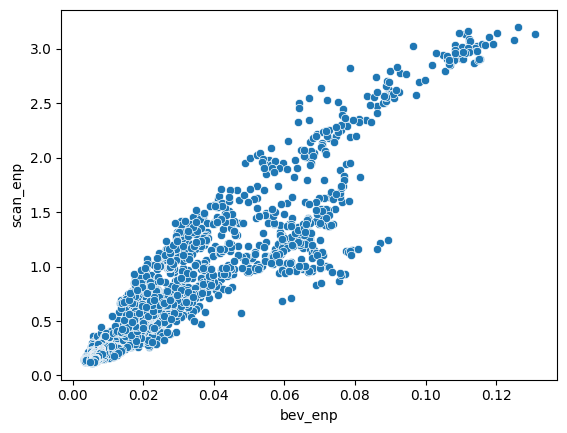

In [79]:
import seaborn as sns

sns.scatterplot(x=df['bev_enp'], y=df['scan_enp'])

946 3787
[GBR x and y] test on train dataset
mse:  2.225866417783753
rmse:  1.4919337846512333
mae:  0.9945798440091375
r2:  0.7457615333289047
[GBR x and y] test on test dataset
mse:  5.642730637497259
rmse:  2.375443250742324
mae:  1.5654884912112326
r2:  0.3674232988517865


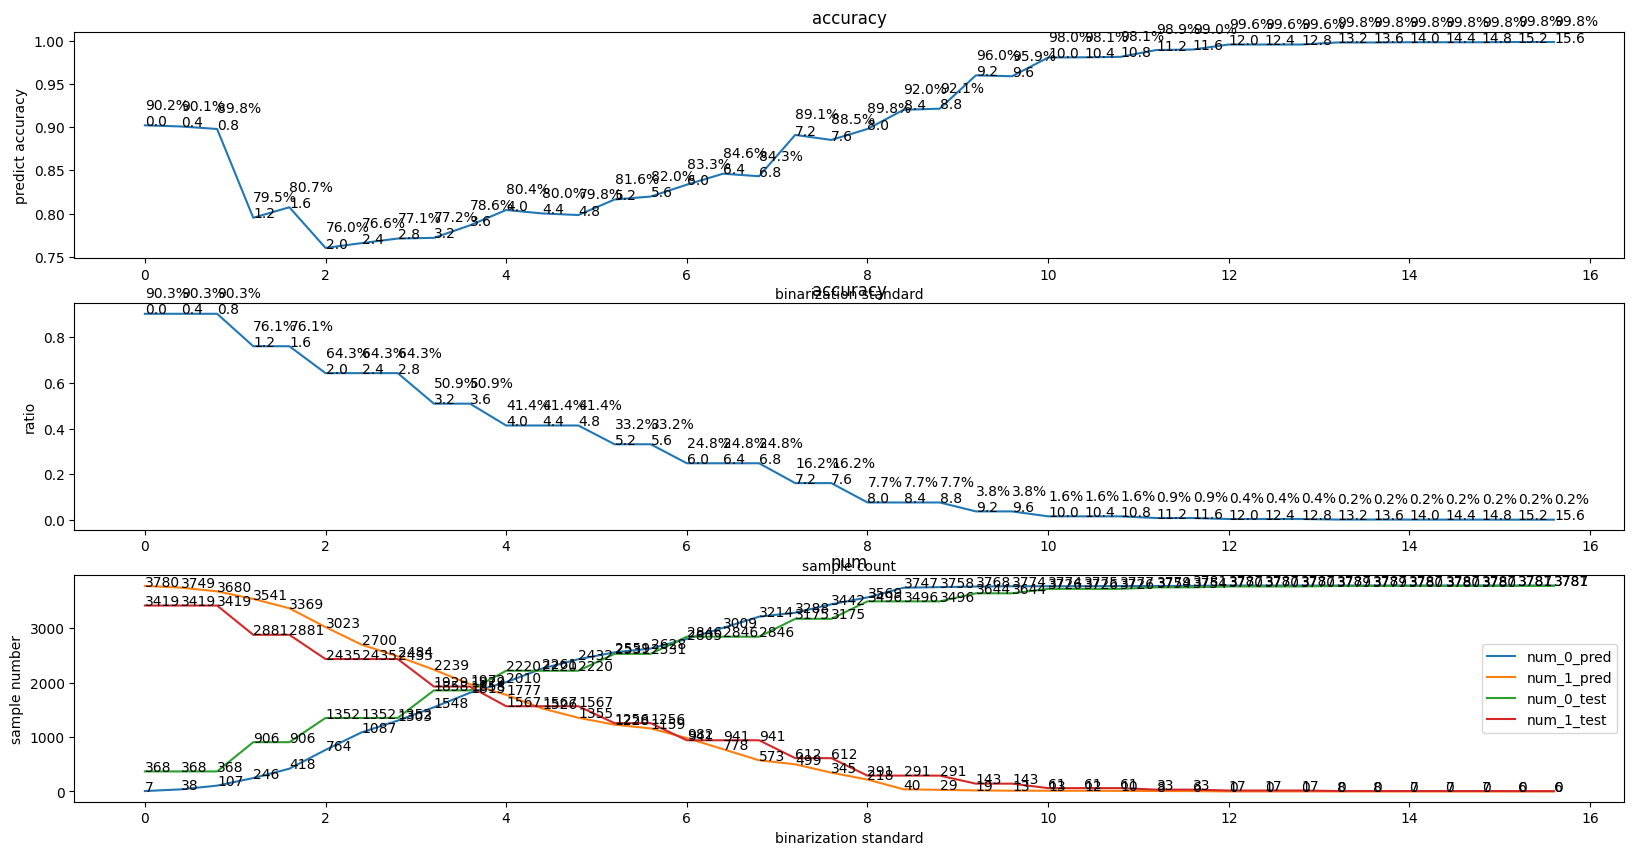

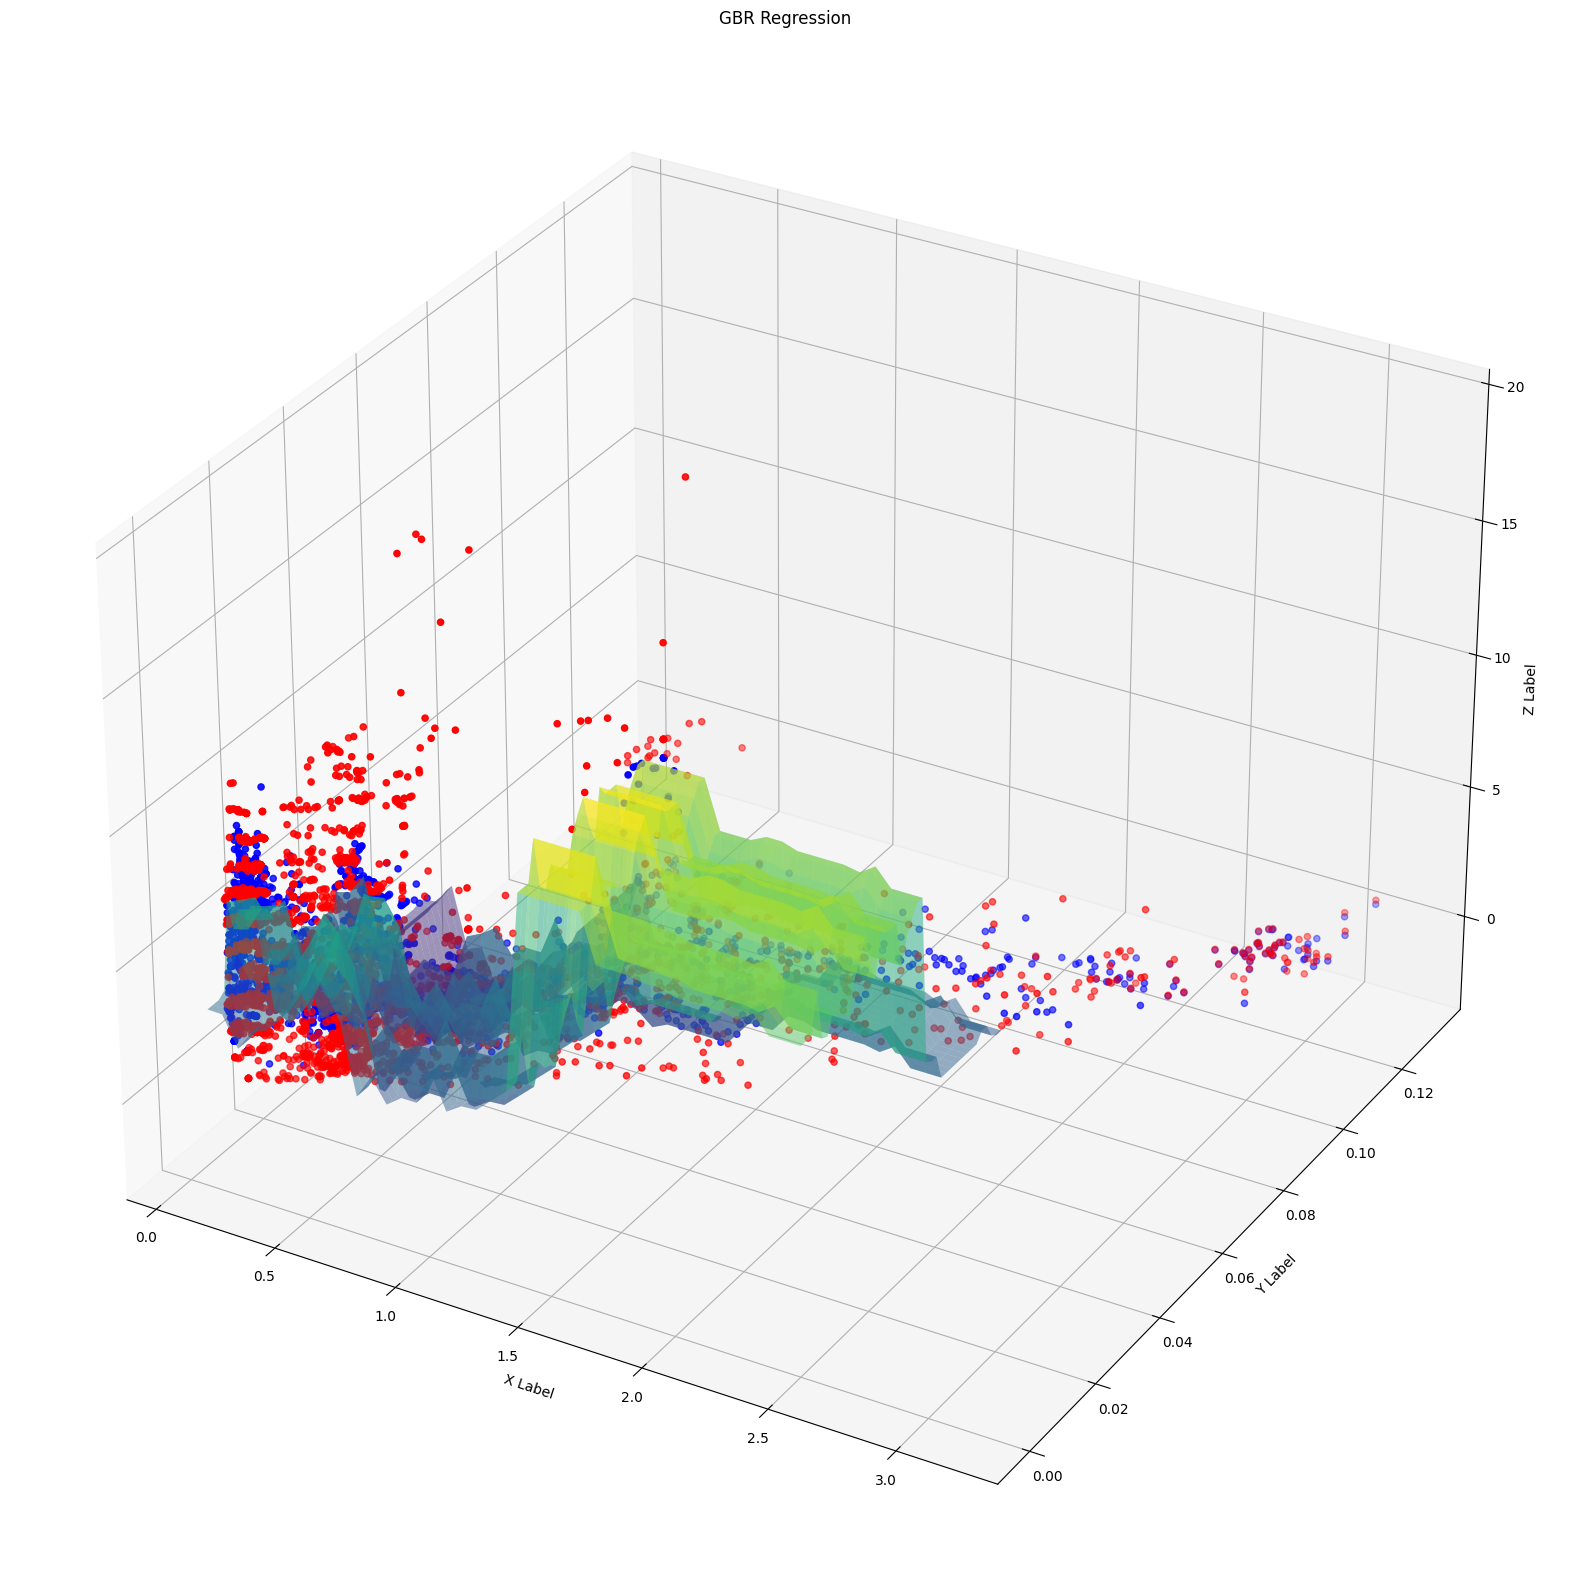

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import random

# set the random seed
random.seed(114)


def z_standrand_scaler( y_pred, y_test):
    # draw the accuracy curve
    accuracys = []
    ratios = []
    num_0_pred = []
    num_1_pred = []
    num_0_test = []
    num_1_test = []

    per = np.arange(0, 16, 0.4)


    for standard in per:
        y_pred2 = y_pred.copy()
        y_test2 = y_test.copy()
        y_pred2[y_pred2 <= standard] = 0
        y_pred2[y_pred2 > standard] = 1
        y_test2[y_test2 <= standard] = 0
        y_test2[y_test2 > standard] = 1
        accuracy = np.sum(y_pred2 == y_test2) / len(y_test2)
        accuracys.append(accuracy)
        
        ratios.append(np.sum(y_test2 == 1) / len(y_test2))
        num_0_pred.append(np.sum(y_pred2 == 0))
        num_1_pred.append(np.sum(y_pred2 == 1))
        num_0_test.append(np.sum(y_test2 == 0))
        num_1_test.append(np.sum(y_test2 == 1))

    # draw the accuracy curve
    plt.figure(figsize=(20,10))
    plt.subplot(3,1,1)
    plt.plot(per, accuracys)
    plt.title('accuracy')
    plt.xlabel('binarization standard')
    plt.ylabel('predict accuracy')
    for i in range(len(per)):
        plt.text(per[i], accuracys[i], str(round(accuracys[i]*100, 1))+'%\n'+str(round(i*0.4,1)))


    plt.subplot(3,1,2)
    plt.plot(per, ratios)
    plt.title('accuracy')
    plt.xlabel('sample count')
    plt.ylabel('ratio')
    for i in range(len(per)):
        plt.text(per[i], ratios[i], str(round(ratios[i]*100, 1))+'%\n'+str(round(i*0.4,1)))


    plt.subplot(3,1,3)
    # draw 0 and 1 in one figure
    plt.plot(per, num_0_pred, label='num_0_pred')
    plt.plot(per, num_1_pred, label='num_1_pred')
    plt.plot(per, num_0_test, label='num_0_test')
    plt.plot(per, num_1_test, label='num_1_test')
    plt.xlabel('binarization standard')
    plt.ylabel('sample number')
    # text the accuracy of each point
    for i in range(len(per)):
        # plt.text(per[i], num_1_pred[i], str(round(accuracys[i], 3)))
        plt.text(per[i], num_0_pred[i], str(round(num_0_pred[i], 3)))
        plt.text(per[i], num_1_pred[i], str(round(num_1_pred[i], 3)))
        plt.text(per[i], num_0_test[i], str(round(num_0_test[i], 3)))
        plt.text(per[i], num_1_test[i], str(round(num_1_test[i], 3)))

    plt.legend()
    plt.title('num')
    plt.show()

    return

def evaluate_regression(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, mae, r2


def test_on_local(filp,use,X_train, X_test, y_train, y_test):

    if use:
        index = np.where(y_train> filp)
        X_train = np.concatenate((X_train, X_train[index]), axis=0)
        y_train = np.concatenate((y_train, y_train[index]), axis=0)

        X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.8)


    #gbr = GradientBoostingRegressor(loss='huber',learning_rate=0.2,n_estimators=100, min_samples_leaf=10, max_depth=10, max_features=15, random_state=42)
    gbr = GradientBoostingRegressor(loss='huber',learning_rate=0.2,n_estimators=100, random_state=42)
    gbr.fit(X_train,y_train)
    y_pred = gbr.predict(X_train)
    gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_train, y_pred)
    print('[GBR x and y] test on train dataset')
    print('mse: ', gbr_mse)
    print('rmse: ', gbr_rmse)
    print('mae: ', gbr_mae)
    print('r2: ', gbr_r2)

    y_pred = gbr.predict(X_test)
    gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test, y_pred)
    print('[GBR x and y] test on test dataset')
    print('mse: ', gbr_mse)
    print('rmse: ', gbr_rmse)
    print('mae: ', gbr_mae)
    print('r2: ', gbr_r2)

    z_standrand_scaler(y_pred, y_test)

    # vis the test data and curve in 3D

    #生成网格点
    X, Y = np.meshgrid(np.linspace(0.1, 2.5, 40), np.linspace(0, 0.06, 40))
    # X, Y = np.meshgrid(np.linspace(-1.1, 1.1, 30), np.linspace(-4.0, -1.9, 30))
    Z = gbr.predict(np.column_stack((X.ravel(), Y.ravel())))
    Z = Z.reshape(X.shape)
    # Z[Z <= 0] = np.nan
    fig = plt.figure(figsize=(20,24))
    ax = fig.add_subplot(111, projection='3d')

    # ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', marker='o')
    ax.scatter(X_test[:,0], X_test[:,1], y_test, c='r', marker='o')
    ax.scatter(X_test[:,0], X_test[:,1], y_pred, c='b', marker='o')
 
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('GBR Regression')
    ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.5)
    plt.show()

print(len(X_train), len(X_test))
test_on_local(10,False,X_train, X_test, y_train, y_test)